In [4]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from show_images import mostrar_imagen, mostrar_outfit
from outfit_cleaning import replace_codes,contiene_numeros,tiene_mas_de_dos,cumple_condiciones
from generate_outfits import generate_new_outfits_optimized,recomendar_outfits
import re
import networkx as nx
import ast
import pickle

## Load Data

In [5]:
tabla_final=pd.read_csv("tabla_final.csv")
df_out_product_expanded_subset=pd.read_csv("outfits.csv")

## Create Graph

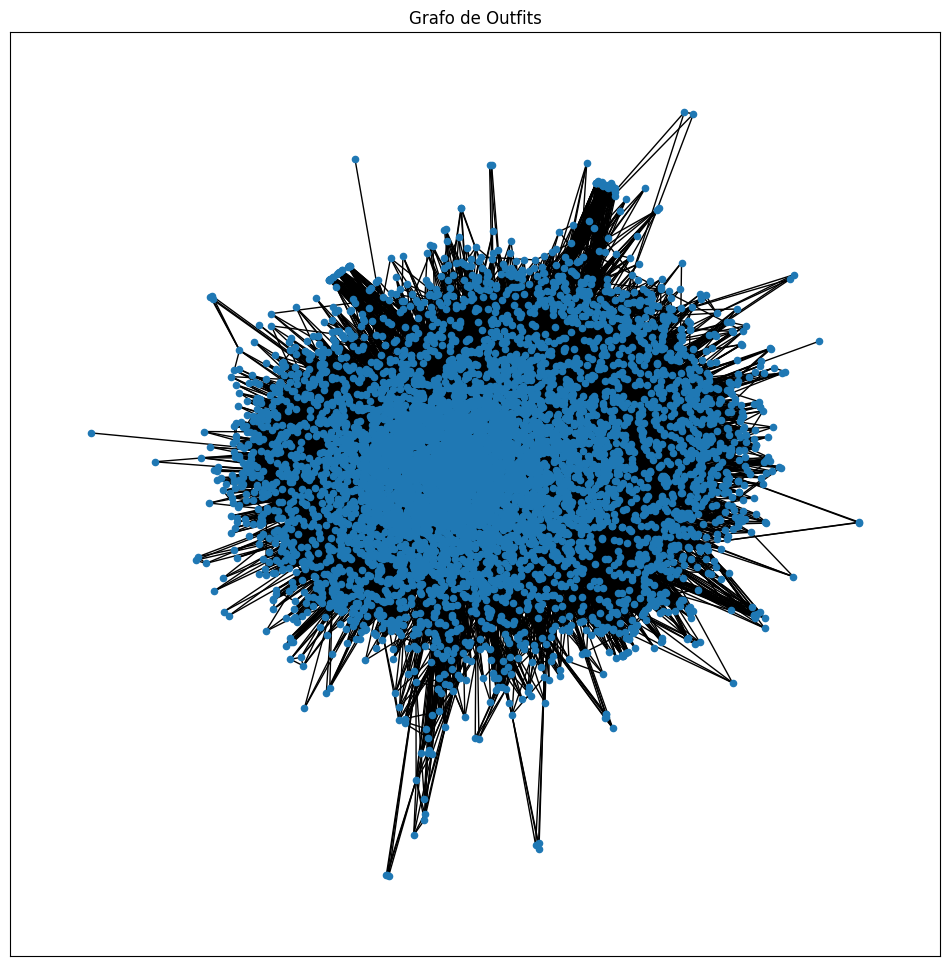

In [6]:
G2 = nx.Graph()

# Add nodes to the graph (each piece of clothing is a node)
for cod_modelo_color in tabla_final['cod_modelo_color'].unique():
    G2.add_node(cod_modelo_color)

# Add edges (connect clothing pieces that appear in the same outfit)
for cod_outfit in tabla_final['cod_outfit'].unique():
    # Get a unique list of clothing pieces in this outfit
    outfit_pieces = list(set(tabla_final[tabla_final['cod_outfit'] == cod_outfit]['cod_modelo_color']))

    # Create an edge between all pieces of clothing in this outfit
    for i in range(len(outfit_pieces)):
        for j in range(i+1, len(outfit_pieces)):
            G2.add_edge(outfit_pieces[i], outfit_pieces[j])
            
plt.figure(figsize=(12, 12))  # Ajusta el tamaño según tus necesidades
nx.draw_networkx(G2, with_labels=False, node_size=20, font_size=10)
plt.title("Grafo de Outfits")
plt.show()

## Show recomenations

In [7]:
# Ejemplo de uso
cod_modelo_color_ejemplo = '53000586-TO'  # Reemplaza con un código real
outfits_recomendados = recomendar_outfits(cod_modelo_color_ejemplo, G2)
print(outfits_recomendados)

['53023028-99', '53095768-99', '57006706-99', '53030636-07', '57077687-99', '53081158-OR', '53000759-99', '57037512-CG', '57057687-81', '53030619-01', '57058260-76', '53021099-OR', '53003778-OR', '53000765-OR', '53073774-01', '53087684-32', '53093765-99', '53083744-07', '53073708-65', '53090517-08', '53053763-30', '53093782-CU', '51083785-94', '51023030-01', '51057017-37', '53095751-99', '57065943-99', '53080809-OR', '53091077-30', '53053034-56', '53093787-OR', '53023762-99', '51045734-99', '53053793-OR', '57017879-CG', '57095931-85', '57005937-OR', '53090616-99', '53091158-OR', '53050576-01', '53073754-OR', '53090511-CU', '53070773-01', '53030691-OR', '53075779-99', '53000874-02', '53013792-99', '57007693-91', '53021098-OR', '53003753-CU', '57057700-99', '53050829-OR', '53080716-OR', '57005926-OR', '53077019-05']


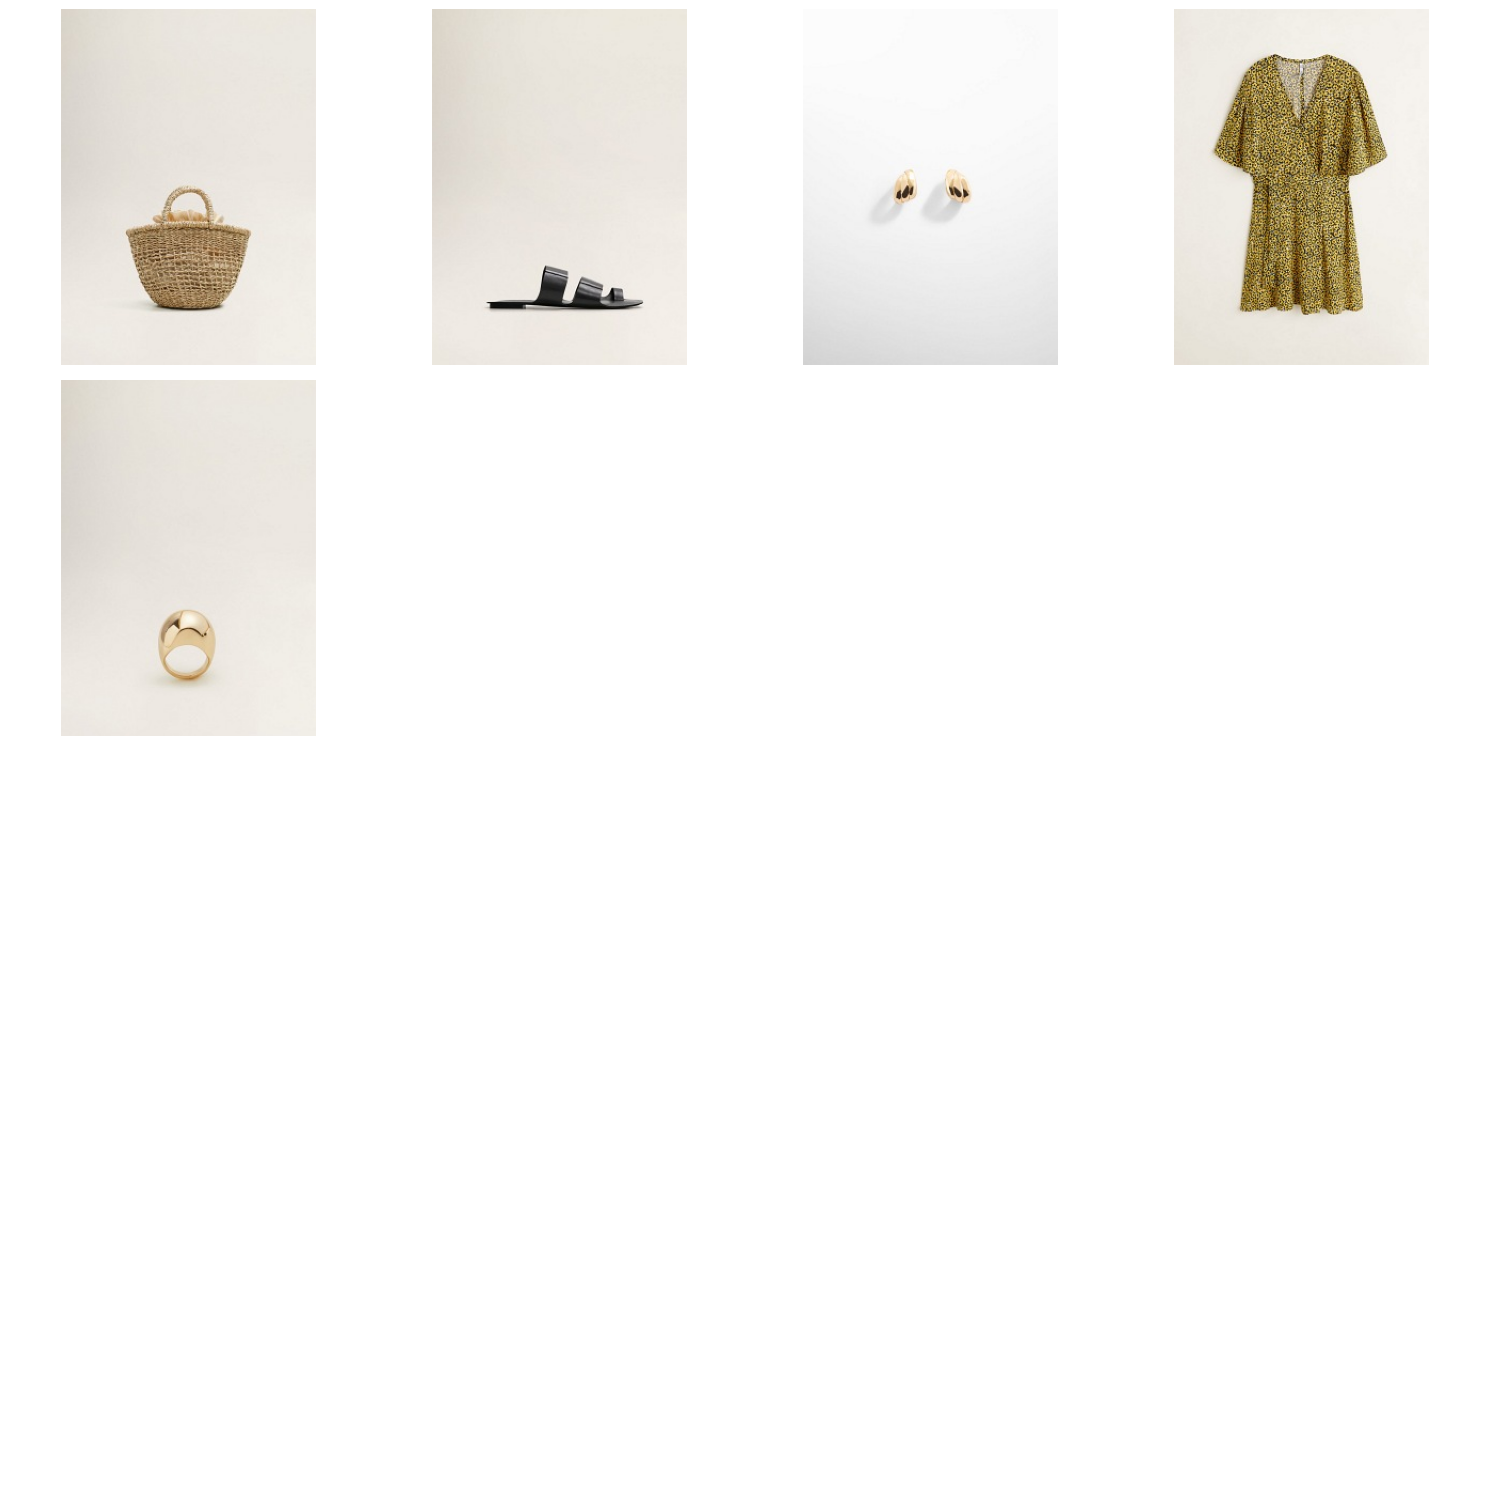

In [8]:
mostrar_outfit(df_out_product_expanded_subset, tabla_final,130424)



## Save data

In [9]:
with open('my_graph.pickle', 'wb') as f:
    pickle.dump(G2, f)
